### **1. Importing Data of gold price from kaggle**

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("farzadnekouei/gold-price-10-years-20132023")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/farzadnekouei/gold-price-10-years-20132023/versions/1


###**2. Checking Imported Data (Dataset Basic Information:)**

In [5]:
import pandas as pd
file_path = 'Gold_Price_(2013-2023).csv'

try:
    df = pd.read_csv(file_path)
    print(df.head())
except Exception as e:
    print(f"An error occurred: {e}")

         Date     Price      Open      High       Low     Vol. Change %
0  12/30/2022  1,826.20  1,821.80  1,832.40  1,819.80  107.50K    0.01%
1  12/29/2022  1,826.00  1,812.30  1,827.30  1,811.20  105.99K    0.56%
2  12/28/2022  1,815.80  1,822.40  1,822.80  1,804.20  118.08K   -0.40%
3  12/27/2022  1,823.10  1,808.20  1,841.90  1,808.00  159.62K    0.74%
4  12/26/2022  1,809.70  1,805.80  1,811.95  1,805.55      NaN    0.30%


In [6]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [7]:
print(df.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [8]:
print(df.head())

         Date     Price      Open      High       Low     Vol. Change %
0  12/30/2022  1,826.20  1,821.80  1,832.40  1,819.80  107.50K    0.01%
1  12/29/2022  1,826.00  1,812.30  1,827.30  1,811.20  105.99K    0.56%
2  12/28/2022  1,815.80  1,822.40  1,822.80  1,804.20  118.08K   -0.40%
3  12/27/2022  1,823.10  1,808.20  1,841.90  1,808.00  159.62K    0.74%
4  12/26/2022  1,809.70  1,805.80  1,811.95  1,805.55      NaN    0.30%


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


###**3. Data Cleaning of Imported Data**

In [10]:
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

In [11]:
#We convert it's data type to datetime and then sort this feature in ascending order:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
#change the data type of the numerical variables to float
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

In [13]:
df.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


In [14]:
#Checking Duplicates
df.duplicated().sum()

0

In [15]:
#Checking Missing Values
df.isnull().sum().sum()

0

###**4. Data Analysis and Visualization**

4.1 Line Chart: Gold Price Trend

In [16]:
import plotly.express as px
fig = px.line(y=df.Price, x=df.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

4.2 Candlestick Chart

In [17]:
from datetime import datetime, timedelta
import plotly.graph_objects as go
end_date = df['Date'].max()
start_date = end_date - timedelta(days=365)
df_last_year = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
candlestick_fig = go.Figure(data=[
    go.Candlestick(
        x=df_last_year['Date'],open=df_last_year['Open'],high=df_last_year['High'],low=df_last_year['Low'],close=df_last_year['Price'])])
candlestick_fig.update_layout(
    title={'text': "Candlestick Chart of Gold Prices (Last 1 Year)",'y': 0.95,'x': 0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Date",yaxis_title="Price (USD)",plot_bgcolor='rgba(255,223,0,0.8)')
candlestick_fig.show()

4.3 Bar Chart: Monthly Average Gold Prices

In [18]:
import plotly.graph_objects as go
monthly_avg = df.groupby(df['Date'].dt.month)['Price'].mean().reset_index()
monthly_avg.columns = ['Month', 'Avg_Price']
fig = go.Figure()
fig.add_trace(go.Bar(x=monthly_avg['Month'], y=monthly_avg['Avg_Price'], name='Avg Price', marker_color='gold'))
fig.add_trace(go.Scatter(x=monthly_avg['Month'], y=monthly_avg['Avg_Price'], mode='lines+markers', name='Trend', line=dict(color='black')))
fig.update_layout(
    title={'text': "Monthly Average Gold Price",'y': 0.95,'x': 0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Month",yaxis_title="Average Price (USD)",plot_bgcolor='rgba(255,223,0,0.8)')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', selector=dict(type='bar'))
fig.show()

4.4  High vs. Low Prices

In [19]:
import plotly.graph_objects as go
from datetime import datetime, timedelta
end_date = df['Date'].max()
start_date = end_date - timedelta(days=3 * 365)
df_last_3_years = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_last_3_years['Date'], y=df_last_3_years['High'], mode='lines', name='High', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df_last_3_years['Date'],y=df_last_3_years['Low'],mode='lines',name='Low',line=dict(color='black')))
fig.update_layout(title={'text': "High vs. Low Gold Prices (Last 3 Years)",'y': 0.95,'x': 0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Date",yaxis_title="Price (USD)",plot_bgcolor='rgba(255,223,0,0.8)',legend_title="Price Type")
fig.show()

4.5 Box Plot

In [20]:
fig = px.box(df, y='Price', title="Box Plot of Gold Prices")
fig.update_layout(
    yaxis_title="Price (USD)",
    plot_bgcolor='rgba(255,223,0,0.8)'
)
fig.show()

4.6  Histogram: Distribution of Gold Prices

In [21]:
fig = px.histogram(df, x='Price', nbins=30, title="Distribution of Gold Prices")
fig.update_layout(
    xaxis_title="Price (USD)",
    yaxis_title="Frequency",
    plot_bgcolor='rgba(255,223,0,0.8)'
)
fig.show()


4.7 Heatmap: Correlation Between Variables

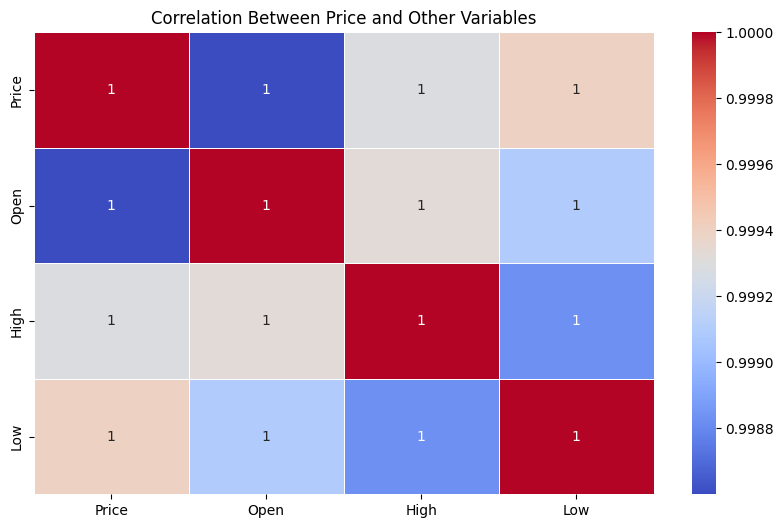

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Price', 'Open', 'High', 'Low']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Price and Other Variables')
plt.show()


4.8 Area Chart: Cumulative Gold Price Change

In [23]:
df['Cumulative Price Change'] = df['Price'].cumsum()

fig = px.area(df, x='Date', y='Cumulative Price Change', title="Cumulative Gold Price Change")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Cumulative Price Change (USD)",
    plot_bgcolor='rgba(255,223,0,0.8)'
)
fig.show()

4.9 Stacked Bar Chart: Monthly Price Range

In [24]:
df['Month'] = df['Date'].dt.month
df['Price Range'] = pd.cut(df['Price'], bins=[0, 1500, 2000, 2500, 3000], labels=['Low', 'Medium', 'High', 'Very High'])

monthly_price_range = df.groupby(['Month', 'Price Range']).size().unstack().fillna(0)

fig = px.bar(monthly_price_range, x=monthly_price_range.index, y=monthly_price_range.columns,
             title="Monthly Distribution of Price Ranges", barmode='stack')
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Count",
    plot_bgcolor='rgba(255,223,0,0.8)'
)
fig.show()


<ipython-input-24-3a445866b2e0>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



4.10 Violin Plot: Price Distribution by Month

In [25]:
fig = px.violin(df, x='Month', y='Price', box=True, title="Price Distribution by Month")
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Price (USD)",
    plot_bgcolor='rgba(255,223,0,0.8)'
)
fig.show()

The analysis focuses on exploring the historical trends and patterns of gold prices using a dataset spanning from 2013 to 2023.

**1. Data Import and Cleaning:**

Gold price data was imported.
Missing values were handled.
Data types were converted (e.g., 'Date' to datetime, numerical columns to float).


**2. Data Analysis and Visualization:**

* The analysis used several visualization methods to gain insights:

* Trend Analysis: A line chart showed an upward trend in gold prices over the years.

* Candlestick Chart: Daily price movements were visualized for the past year.

* Monthly Averages: Bar and line charts displayed average gold prices for each month to identify seasonal patterns.

* High/Low Comparison: A line chart compared daily high and low prices for the last 3 years to highlight volatility.

* Distribution: A box plot and histogram revealed the distribution of gold prices and potential outliers.

* Correlation: A heatmap showed strong positive correlations between price, open, high, and low prices.

* Cumulative Changes: An area chart visualized the cumulative change in gold price.

* Monthly Price Ranges: A stacked bar chart showed the monthly distribution of gold prices within predefined price ranges.

* Price Distribution by Month: A violin plot displayed the distribution of gold prices for each month to reveal monthly variations.





**3. Conclusion:**

The analysis provided a comprehensive overview of gold price trends and patterns, highlighting trends, seasonality, volatility, and relationships between different price-related variables.
